# Explore here

In [56]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
spotipy.Spotify()

In [57]:
client_id = os.environ.get("CLIENT_ID")  
client_secret = os.environ.get("CLIENT_SECRET")

# Configurar el administrador de autenticación con tus credenciales de Spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

artist_id = '49qiE8dj4JuNdpYGRPdKbF'

# Obtener las pistas principales del artista
top_tracks = sp.artist_top_tracks(artist_id, country='US')  


data = []

if top_tracks and 'tracks' in top_tracks:
    for track in top_tracks['tracks']:
        nombre = track["name"]
        popularidad = track["popularity"]
        duracion_ms = track["duration_ms"]
        duracion_s = duracion_ms / 1000  # Milisegundos a segundos

        # Agregar información a la lista como un diccionario
        data.append({"Nombre": nombre, "Popularidad/100": popularidad, "Duración(s)": duracion_s})

# Imprimir la información de las pistas
for item in data:
    print(item)

{'Nombre': 'Through Glass', 'Popularidad/100': 68, 'Duración(s)': 282.946}
{'Nombre': 'Absolute Zero', 'Popularidad/100': 64, 'Duración(s)': 229.84}
{'Nombre': 'Wicked Game - Acoustic; Live', 'Popularidad/100': 62, 'Duración(s)': 267.253}
{'Nombre': 'Bother', 'Popularidad/100': 60, 'Duración(s)': 240.4}
{'Nombre': 'Song #3', 'Popularidad/100': 59, 'Duración(s)': 256.533}
{'Nombre': "Say You'll Haunt Me", 'Popularidad/100': 56, 'Duración(s)': 264.373}
{'Nombre': '30/30-150', 'Popularidad/100': 53, 'Duración(s)': 258.066}
{'Nombre': 'Tired', 'Popularidad/100': 52, 'Duración(s)': 251.84}
{'Nombre': 'Hesitate', 'Popularidad/100': 48, 'Duración(s)': 256.346}
{'Nombre': 'Taciturn', 'Popularidad/100': 49, 'Duración(s)': 325.626}


In [58]:
tracks_df = pd.DataFrame.from_records(data)
ds_top3 = tracks_df.head(n=3)



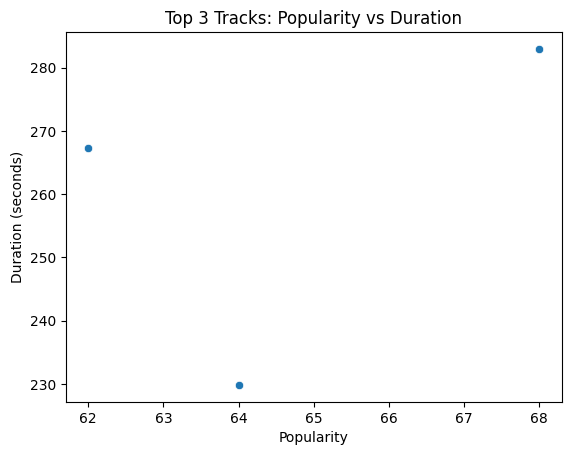

Como se puede observar, no hay una relación directa entre la duración de la canción y su popularidad.


In [59]:

# Crear el gráfico de dispersión
scatter_plot = sns.scatterplot(data=ds_top3, x="Popularidad/100", y="Duración(s)")

# Configurar el título y las etiquetas
scatter_plot.set_title("Top 3 Tracks: Popularity vs Duration")
scatter_plot.set_xlabel("Popularity")
scatter_plot.set_ylabel("Duration (seconds)")
fig = scatter_plot.get_figure()


plt.show()
print("Como se puede observar, no hay una relación directa entre la duración de la canción y su popularidad.")